<a href="https://colab.research.google.com/github/salmaatamang1/python01project/blob/master/bmi_predication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.DataFrame(pd.read_csv("/content/drive/MyDrive/dataset/bmi.csv"))
df

,Gender,Height,Weight,bmi
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [ ]:
df.shape

(500, 4)

In [ ]:
df.describe()

,Height,Weight,bmi
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   bmi     500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [ ]:
sum(df.duplicated(subset='Weight'))==0 #none gives error why

False

In [ ]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
bmi       0
dtype: int64

In [ ]:
auto=df[['Gender','Height','Weight','bmi']]
auto

,Gender,Height,Weight,bmi
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [ ]:
sex=pd.get_dummies(auto['Gender'],drop_first=True)

In [ ]:
auto=pd.concat([auto,sex],axis=1)
auto

,Gender,Height,Weight,bmi,Male
0,Male,174,96,4,1
1,Male,189,87,2,1
2,Female,185,110,4,0
3,Female,195,104,3,0
4,Male,149,61,3,1
...,...,...,...,...,...
495,Female,150,153,5,0
496,Female,184,121,4,0
497,Female,141,136,5,0
498,Male,150,95,5,1


In [ ]:
auto.drop(['Gender'],axis=1,inplace=True)
auto

,Height,Weight,bmi,Male
0,174,96,4,1
1,189,87,2,1
2,185,110,4,0
3,195,104,3,0
4,149,61,3,1
...,...,...,...,...
495,150,153,5,0
496,184,121,4,0
497,141,136,5,0
498,150,95,5,1


In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test=train_test_split(auto,train_size=0.6,random_state=100)
df_train



,Height,Weight,bmi,Male
451,172,90,4,0
259,184,132,4,0
318,170,95,4,1
159,181,105,4,1
285,181,139,4,1
...,...,...,...,...
343,179,83,3,1
359,186,148,4,0
323,187,140,5,1
280,193,65,1,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
arr=['Height','Weight','bmi']
df_train[arr]=scaler.fit_transform(df_train[arr])

In [ ]:
df_train.head()

,Height,Weight,bmi,Male
451,0.542373,0.363636,0.8,0
259,0.745763,0.745455,0.8,0
318,0.508475,0.409091,0.8,1
159,0.694915,0.500000,0.8,1
285,0.694915,0.809091,0.8,1


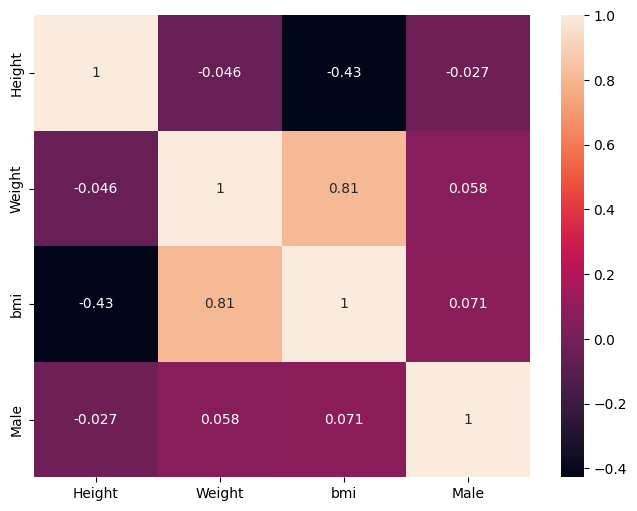

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

In [ ]:
y_train=df_train.pop('bmi')
x_train=df_train

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
model=LinearRegression()
model.fit(x_train,y_train)
rfe=RFE(model,n_features_to_select=10)
rfe=rfe.fit(x_train,y_train)
x_train.columns



Index(['Height', 'Weight', 'Male'], dtype='object')

In [ ]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('Height', True, 1), ('Weight', True, 1), ('Male', True, 1)]

In [ ]:
col=x_train.columns[rfe.support_]
col

Index(['Height', 'Weight', 'Male'], dtype='object')

In [ ]:
x_train_rfe=x_train[col]

In [ ]:
import statsmodels.api as sm
x_train_rfe=sm.add_constant(x_train_rfe)
x_train_rfe

,const,Height,Weight,Male
451,1.0,0.542373,0.363636,0
259,1.0,0.745763,0.745455,0
318,1.0,0.508475,0.409091,1
159,1.0,0.694915,0.500000,1
285,1.0,0.694915,0.809091,1
...,...,...,...,...
343,1.0,0.661017,0.300000,1
359,1.0,0.779661,0.890909,0
323,1.0,0.796610,0.818182,1
280,1.0,0.898305,0.136364,1


In [ ]:
model=sm.OLS(y_train,x_train_rfe).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     433.3
Date:                Tue, 25 Apr 2023   Prob (F-statistic):          6.34e-108
Time:                        15:51:45   Log-Likelihood:                 221.65
No. Observations:                 300   AIC:                            -435.3
Df Residuals:                     296   BIC:                            -420.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5744      0.020     29.039      0.0

In [ ]:
x_train_new=x_train_rfe.drop(["Male"],axis=1)
x_train_new

,const,Height,Weight
451,1.0,0.542373,0.363636
259,1.0,0.745763,0.745455
318,1.0,0.508475,0.409091
159,1.0,0.694915,0.500000
285,1.0,0.694915,0.809091
...,...,...,...
343,1.0,0.661017,0.300000
359,1.0,0.779661,0.890909
323,1.0,0.796610,0.818182
280,1.0,0.898305,0.136364


In [ ]:
import statsmodels.api as sm
x_train_model=sm.add_constant(x_train_new)
x_train_model

,const,Height,Weight
451,1.0,0.542373,0.363636
259,1.0,0.745763,0.745455
318,1.0,0.508475,0.409091
159,1.0,0.694915,0.500000
285,1.0,0.694915,0.809091
...,...,...,...
343,1.0,0.661017,0.300000
359,1.0,0.779661,0.890909
323,1.0,0.796610,0.818182
280,1.0,0.898305,0.136364


In [ ]:
model=sm.OLS(y_train,x_train_model).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     651.2
Date:                Tue, 25 Apr 2023   Prob (F-statistic):          2.61e-109
Time:                        15:52:00   Log-Likelihood:                 221.48
No. Observations:                 300   AIC:                            -437.0
Df Residuals:                     297   BIC:                            -425.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5782      0.019     30.947      0.0

In [ ]:
y_train_predicatedbmi=model.predict(x_train_model)
y_train_predicatedbmi


451    0.627769
259    0.822318
318    0.673545
159    0.666155
285    0.887724
         ...   
343    0.535979
359    0.913394
323    0.854664
280    0.326332
8      0.614577
Length: 300, dtype: float64

In [ ]:
from sklearn.metrics import r2_score 
r2_score(y_train, y_train_predicatedbmi)*100

81.43031824968415

In [ ]:
df_test

,Height,Weight,bmi,Male
69,194,136,4,0
29,179,152,5,1
471,154,112,5,1
344,170,115,4,1
54,196,116,4,1
...,...,...,...,...
117,146,104,5,0
271,152,103,5,1
15,153,107,5,0
257,150,119,5,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
arr1=['Height','Weight','bmi']
df_test[arr1]=scaler.fit_transform(df_test[arr1])

In [ ]:
y_test=df_test.pop('bmi')
x_test=df_test

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
model=LinearRegression()
model.fit(x_test,y_test)
rfe=RFE(model,n_features_to_select=10)
rfe=rfe.fit(x_test,y_test)
x_test.columns

Index(['Height', 'Weight', 'Male'], dtype='object')

In [ ]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('Height', True, 1), ('Weight', True, 1), ('Male', True, 1)]

In [ ]:
col=x_test.columns[rfe.support_]
col

Index(['Height', 'Weight', 'Male'], dtype='object')

In [ ]:
x_test_rfe=x_test[col]

In [ ]:
import statsmodels.api as sm
x_test_rfe=sm.add_constant(x_test_rfe)
x_test_rfe

,const,Height,Weight,Male
69,1.0,0.915254,0.781818,0
29,1.0,0.661017,0.927273,1
471,1.0,0.237288,0.563636,1
344,1.0,0.508475,0.590909,1
54,1.0,0.949153,0.600000,1
...,...,...,...,...
117,1.0,0.101695,0.490909,0
271,1.0,0.203390,0.481818,1
15,1.0,0.220339,0.518182,0
257,1.0,0.169492,0.627273,0


In [ ]:
model=sm.OLS(y_test,x_test_rfe).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     364.8
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           6.42e-80
Time:                        16:06:02   Log-Likelihood:                 163.75
No. Observations:                 200   AIC:                            -319.5
Df Residuals:                     196   BIC:                            -306.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5781      0.022     26.840      0.0

In [ ]:
x_test_new=x_test_rfe.drop(["Male"],axis=1)
x_test_new

,const,Height,Weight
69,1.0,0.915254,0.781818
29,1.0,0.661017,0.927273
471,1.0,0.237288,0.563636
344,1.0,0.508475,0.590909
54,1.0,0.949153,0.600000
...,...,...,...
117,1.0,0.101695,0.490909
271,1.0,0.203390,0.481818
15,1.0,0.220339,0.518182
257,1.0,0.169492,0.627273


In [ ]:
import statsmodels.api as sm
x_test_model=sm.add_constant(x_test_new)
x_test_model

,const,Height,Weight
69,1.0,0.915254,0.781818
29,1.0,0.661017,0.927273
471,1.0,0.237288,0.563636
344,1.0,0.508475,0.590909
54,1.0,0.949153,0.600000
...,...,...,...
117,1.0,0.101695,0.490909
271,1.0,0.203390,0.481818
15,1.0,0.220339,0.518182
257,1.0,0.169492,0.627273


In [ ]:
model=sm.OLS(y_test,x_test_model).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     548.4
Date:                Tue, 25 Apr 2023   Prob (F-statistic):           3.08e-81
Time:                        16:06:27   Log-Likelihood:                 163.50
No. Observations:                 200   AIC:                            -321.0
Df Residuals:                     197   BIC:                            -311.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5838      0.020     29.276      0.0

In [ ]:
y_test_predicatedbmi=model.predict(x_test_model)
y_test_predicatedbmi


69     0.785844
29     1.013430
471    0.918551
344    0.818524
54     0.628417
         ...   
117    0.922331
271    0.869706
15     0.890572
257    0.998682
60     0.225349
Length: 200, dtype: float64

In [ ]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_test_predicatedbmi)*100

84.77243865157064

Text(0, 0.5, 'y_predication')

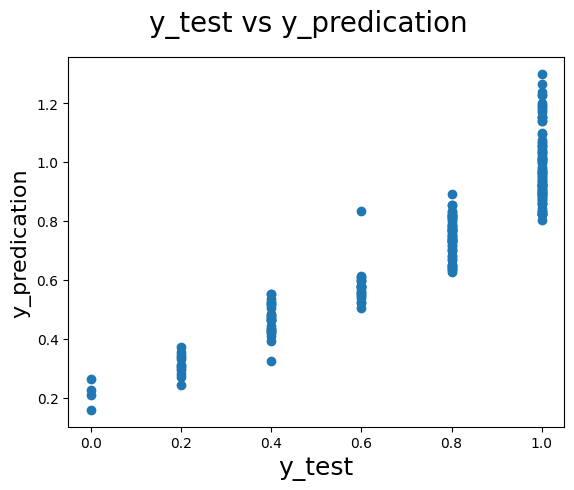

In [ ]:
fig = plt.figure()
plt.scatter(y_test,y_test_predicatedbmi)
fig.suptitle('y_test vs y_predication', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_predication', fontsize=16) 